# NLP | Lab01 | 20211206

## libraries assemble + data import

In [455]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import warnings

In [456]:
# read the data into a dataframe with pandas
df = pd.read_csv('/Users/AFROARC/Documents/GitHub/Working/NLP/Womens Clothing E-Commerce Reviews.csv')

In [457]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [458]:
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [459]:
df.columns= df.columns.str.lower()

In [460]:
df.head()

,unnamed: 0,clothing id,age,title,review text,rating,recommended ind,positive feedback count,division name,department name,class name
0,0,767,33,NaN,absolutely wonderful - silky and sexy and comf...,4,1,0,initmates,intimate,intimates
1,1,1080,34,NaN,love this dress! it's sooo pretty. i happene...,5,1,4,general,dresses,dresses
2,2,1077,60,some major design flaws,i had such high hopes for this dress and reall...,3,0,0,general,dresses,dresses
3,3,1049,50,my favorite buy!,"i love, love, love this jumpsuit. it's fun, fl...",5,1,0,general petite,bottoms,pants
4,4,847,47,flattering shirt,this shirt is very flattering to all due to th...,5,1,6,general,tops,blouses


In [461]:
df2 = df.drop(columns=['age','unnamed: 0', 'clothing id', 'recommended ind','positive feedback count','class name'])

In [462]:
df2.head()

,title,review text,rating,division name,department name
0,NaN,absolutely wonderful - silky and sexy and comf...,4,initmates,intimate
1,NaN,love this dress! it's sooo pretty. i happene...,5,general,dresses
2,some major design flaws,i had such high hopes for this dress and reall...,3,general,dresses
3,my favorite buy!,"i love, love, love this jumpsuit. it's fun, fl...",5,general petite,bottoms
4,flattering shirt,this shirt is very flattering to all due to th...,5,general,tops


## EDA

In [463]:
df2.describe()

,rating
count,23486.000000
mean,4.196032
std,1.110031
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [464]:
df2.shape

(23486, 5)

In [465]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19676 non-null  object
 1   review text      22641 non-null  object
 2   rating           23486 non-null  int64 
 3   division name    23472 non-null  object
 4   department name  23472 non-null  object
dtypes: int64(1), object(4)
memory usage: 917.5+ KB


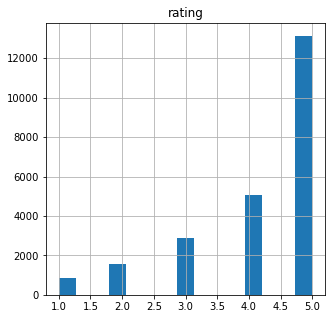

In [466]:
df2.hist(figsize=(5,5),bins=15,);

/opt/anaconda3/envs/classenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


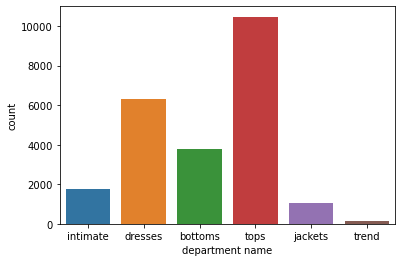

In [467]:
sns.countplot(df['department name']);

/opt/anaconda3/envs/classenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


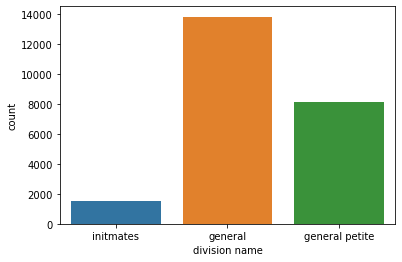

In [468]:
sns.countplot(df['division name']);

/opt/anaconda3/envs/classenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


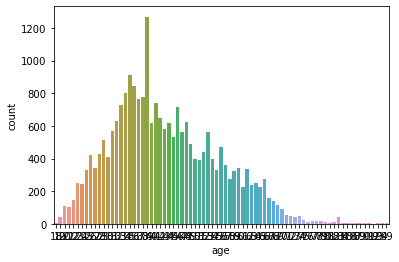

In [469]:
sns.countplot(df['age']);

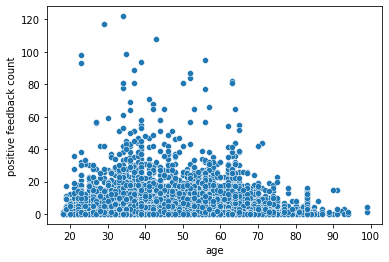

In [470]:
sns.scatterplot(y=df['positive feedback count'], x=df['age']);

In [471]:
df2.head()

,title,review text,rating,division name,department name
0,NaN,absolutely wonderful - silky and sexy and comf...,4,initmates,intimate
1,NaN,love this dress! it's sooo pretty. i happene...,5,general,dresses
2,some major design flaws,i had such high hopes for this dress and reall...,3,general,dresses
3,my favorite buy!,"i love, love, love this jumpsuit. it's fun, fl...",5,general petite,bottoms
4,flattering shirt,this shirt is very flattering to all due to th...,5,general,tops


## group by division/department/rating

In [472]:
grouped = df.groupby(["division name","department name"])["rating"].mean()

In [473]:
grouped

division name   department name
general         bottoms            4.268686
                dresses            4.163003
                jackets            4.240310
                tops               4.148749
                trend              3.822917
general petite  bottoms            4.329356
                dresses            4.133256
                intimate           4.240343
                jackets            4.304910
                tops               4.216469
                trend              3.782609
initmates       intimate           4.286285
Name: rating, dtype: float64

In [474]:
#this dataframe can be easily visualised as a bar chart - do so now (image clothing_rating_chart.png)


In [475]:
df.groupby(["division name", "department name"], as_index=False)["rating"].mean()

,division name,department name,rating
0,general,bottoms,4.268686
1,general,dresses,4.163003
2,general,jackets,4.240310
3,general,tops,4.148749
4,general,trend,3.822917
5,general petite,bottoms,4.329356
6,general petite,dresses,4.133256
7,general petite,intimate,4.240343
8,general petite,jackets,4.304910
9,general petite,tops,4.216469


In [476]:
df_by_div = df.groupby(['division name', 'department name'],as_index = False).agg({'rating':'mean'})

In [477]:
df_by_div

,division name,department name,rating
0,general,bottoms,4.268686
1,general,dresses,4.163003
2,general,jackets,4.240310
3,general,tops,4.148749
4,general,trend,3.822917
5,general petite,bottoms,4.329356
6,general petite,dresses,4.133256
7,general petite,intimate,4.240343
8,general petite,jackets,4.304910
9,general petite,tops,4.216469


## average review rating

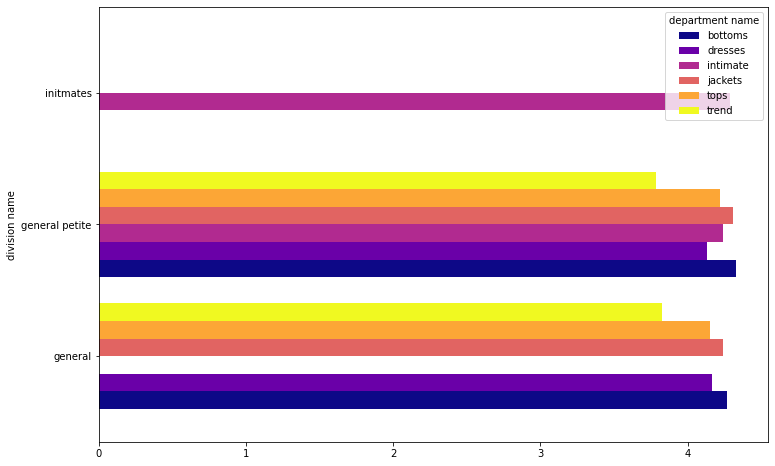

In [528]:
df_by_div.pivot("division name", "department name", "rating").plot(kind='barh', figsize=(12,8), width=0.8,cmap='plasma');

## polarity tests

In [480]:
df2.head()

,title,review text,rating,division name,department name
0,NaN,absolutely wonderful - silky and sexy and comf...,4,initmates,intimate
1,NaN,love this dress! it's sooo pretty. i happene...,5,general,dresses
2,some major design flaws,i had such high hopes for this dress and reall...,3,general,dresses
3,my favorite buy!,"i love, love, love this jumpsuit. it's fun, fl...",5,general petite,bottoms
4,flattering shirt,this shirt is very flattering to all due to th...,5,general,tops


In [481]:
print(df2.values[0][1])

absolutely wonderful - silky and sexy and comfortable


In [482]:
testimonial = TextBlob(df2.values[0][1])
testimonial.sentiment

Sentiment(polarity=0.6333333333333333, subjectivity=0.9333333333333332)

In [483]:
for i in range(3):
    print(df2.values[i][1])
    testimonial = TextBlob(df2.values[i][1])
    print(testimonial.sentiment)
    print()
    i + 1    

absolutely wonderful - silky and sexy and comfortable
Sentiment(polarity=0.6333333333333333, subjectivity=0.9333333333333332)

love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.
Sentiment(polarity=0.33958333333333335, subjectivity=0.7250000000000001)

i had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper -

In [484]:
# sentences

In [485]:
TextBlob(df2.values[2][1]).sentences

[Sentence("i had such high hopes for this dress and really wanted it to work for me."),
 Sentence("i initially ordered the petite small (my usual size) but i found this to be outrageously small."),
 Sentence("so small in fact that i could not zip it up!"),
 Sentence("i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers."),
 Sentence("imo, a major design flaw was the net over layer sewn directly into the zipper - it c")]

In [486]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19676 non-null  object
 1   review text      22641 non-null  object
 2   rating           23486 non-null  int64 
 3   division name    23472 non-null  object
 4   department name  23472 non-null  object
dtypes: int64(1), object(4)
memory usage: 917.5+ KB


In [488]:
df3 = df2.dropna(axis=0, subset=['review text'])

In [489]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19675 non-null  object
 1   review text      22641 non-null  object
 2   rating           22641 non-null  int64 
 3   division name    22628 non-null  object
 4   department name  22628 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


In [490]:
df3 = df3.reset_index(drop=True)

In [493]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22641 entries, 0 to 22640
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19675 non-null  object
 1   review text      22641 non-null  object
 2   rating           22641 non-null  int64 
 3   division name    22628 non-null  object
 4   department name  22628 non-null  object
dtypes: int64(1), object(4)
memory usage: 884.5+ KB


In [498]:
def sentiment(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

In [ ]:
df3['polarity'] = df3['review text'].apply(sentiment).apply(lambda x: x[0])

In [501]:
df3.head()

,title,review text,rating,division name,department name,polarity
0,NaN,absolutely wonderful - silky and sexy and comf...,4,initmates,intimate,0.633333
1,NaN,love this dress! it's sooo pretty. i happene...,5,general,dresses,0.339583
2,some major design flaws,i had such high hopes for this dress and reall...,3,general,dresses,0.073675
3,my favorite buy!,"i love, love, love this jumpsuit. it's fun, fl...",5,general petite,bottoms,0.550000
4,flattering shirt,this shirt is very flattering to all due to th...,5,general,tops,0.512891


## minimum review polarity

In [503]:
grouped2 = df3.groupby(["division name","department name"])["polarity"].min()

In [504]:
grouped2

division name   department name
general         bottoms           -0.533333
                dresses           -0.916667
                jackets           -0.750000
                tops              -0.975000
                trend             -0.270833
general petite  bottoms           -0.257778
                dresses           -0.400000
                intimate          -0.575000
                jackets           -0.562500
                tops              -0.700000
                trend             -0.083333
initmates       intimate          -0.392333
Name: polarity, dtype: float64

In [512]:
df_by_div2 = df3.groupby(['division name', 'department name'],as_index = False).agg({'polarity':'min'})

In [513]:
df_by_div2

,division name,department name,polarity
0,general,bottoms,-0.533333
1,general,dresses,-0.916667
2,general,jackets,-0.750000
3,general,tops,-0.975000
4,general,trend,-0.270833
5,general petite,bottoms,-0.257778
6,general petite,dresses,-0.400000
7,general petite,intimate,-0.575000
8,general petite,jackets,-0.562500
9,general petite,tops,-0.700000


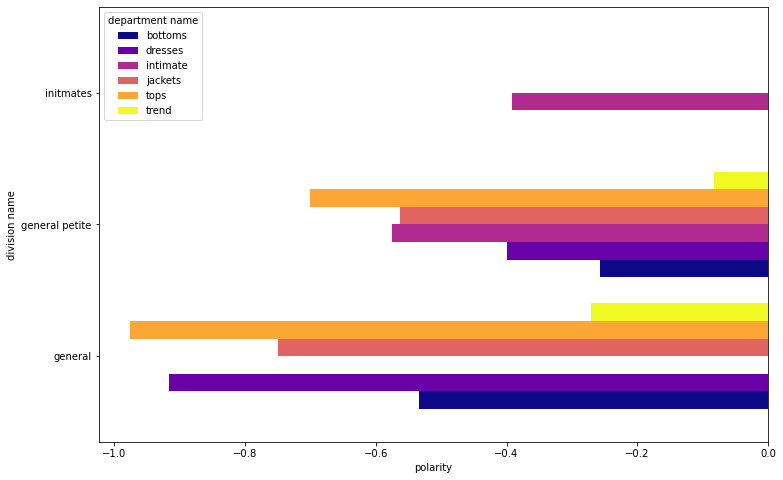

In [527]:
df_by_div2.pivot("division name", "department name", "polarity").plot(kind='barh', figsize=(12,8), width=0.8, cmap='plasma')
plt.xlabel('polarity');

## average review polarity

In [523]:
df_by_div3 = df3.groupby(['division name', 'department name'],as_index = False).agg({'polarity':'mean'})

In [524]:
df_by_div3

,division name,department name,polarity
0,general,bottoms,0.245849
1,general,dresses,0.251091
2,general,jackets,0.237141
3,general,tops,0.247025
4,general,trend,0.203986
5,general petite,bottoms,0.259258
6,general petite,dresses,0.248380
7,general petite,intimate,0.239517
8,general petite,jackets,0.241896
9,general petite,tops,0.256841


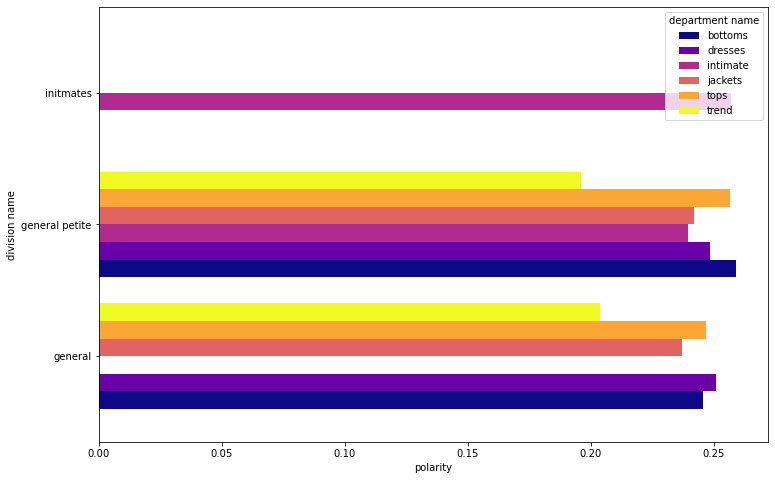

In [536]:
df_by_div3.pivot("division name", "department name", "polarity").plot(kind='barh', figsize=(12,8), width=0.8,cmap='plasma')
plt.xlabel('polarity');